<h2> IAM </h2>


In [1]:
import h5py
import numpy as np

root = "G:/Licenta/Data/DateH5/IAM/"
train = root + "labels_lines_train.h5"
test = root + "labels_lines_test.h5"
valid1 = root + "labels_lines_validation1.h5"
valid2 = root + "labels_lines_validation2.h5"




In [2]:
f = h5py.File(train, 'r')
trainLabels = f.get(train[train.rfind('/') + 1:train.rfind('.')]).value
f = h5py.File(test, 'r')
testLabels = f.get(test[test.rfind('/') + 1:test.rfind('.')]).value
f = h5py.File(valid1 , 'r')
valid1Labels = f.get(valid1[valid1.rfind('/') + 1:valid1.rfind('.')]).value

f = h5py.File(valid2, 'r')
valid2Labels = f.get(valid2[valid2.rfind('/') + 1:valid2.rfind('.')]).value

validLabels = np.append(valid1Labels,valid2Labels)

C:\Users\Eduard\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Caractere unice: 79
Unique words train: 7750
Unique words test: 3605
Unique words validation: 3932
Out of vocabulary: 1634
Out of vocabulary percentage 14.434628975265017


<BarContainer object of 25 artists>

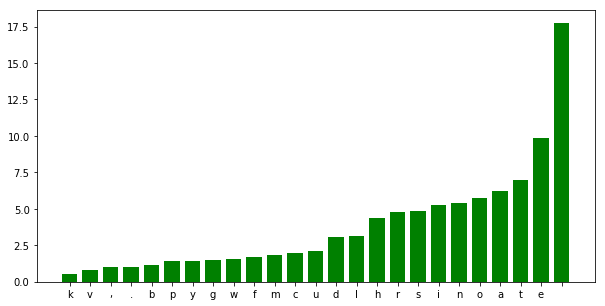

In [51]:
chars = set()
totalChars = 0
char_freq = {}

trainSet = set()
for line in trainLabels:
    chars = chars.union(set(list(line)))
    words = line.split(' ')
    for word in words:
        trainSet.add(word)
    for char in set(line) :
        char_freq[char] = char_freq.get(char, 0) + line.count(char)
    totalChars += len(line)
    
testSet = set()
for line in testLabels:
    chars = chars.union(set(list(line)))
    words = line.split(' ')
    for word in words:
        testSet.add(word)
    for char in set(line) :
        char_freq[char] = char_freq.get(char, 0) + line.count(char)
    totalChars += len(line)
        
validSet = set()
for line in validLabels:
    chars = chars.union(set(list(line)))
    words = line.split(' ')
    for word in words:
        validSet.add(word)
    for char in set(line) :
        char_freq[char] = char_freq.get(char, 0) + line.count(char)
    totalChars += len(line)
        
trainValidSet = trainSet.union(validSet)
testDiffTrainValid = testSet.difference(trainValidSet)
print("Caractere unice:", len(chars))
print("Unique words train:",len(trainSet))
print("Unique words test:",len(testSet))
print("Unique words validation:",len(validSet))
print("Out of vocabulary:", len(testDiffTrainValid))
print("Out of vocabulary percentage", len(testDiffTrainValid) / 
      len(trainValidSet.union(testSet)) * 100)
len(trainValidSet.union(testSet))

for key in char_freq.copy():
    char_freq[key] = char_freq[key] / totalChars * 100

import operator
sorted_dict = sorted(char_freq.items(), key=operator.itemgetter(1))
sorted_dict = [(k,v) for (k,v) in sorted_dict if v > 0.5 ]

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
labels, values = zip(*sorted_dict)
plt.bar(labels,values, width = 0.75, color='g', linewidth = 1)

In [61]:
import cv2
cv2.cv2.version.version

AttributeError: module 'cv2.cv2' has no attribute 'version'